In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from Linear_Regression import LinearRegression

from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# Importing the dataset
data = pd.read_csv('../data/houses.csv')
X = data[['size(sqft)', 'bedrooms', 'floors', 'age']]
y = data['price']
X_label = ['size(sqft)', 'bedrooms', 'floors', 'age']
y_label = 'price'
data.head()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# Convert to numpy array
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [15]:
# Scikit-learn's Linear Regression
sgdr = SGDRegressor(max_iter=1000, learning_rate='constant', eta0=0.01, tol=1e-6, random_state=42)
sgdr.fit(X_train_scaled, y_train)

# My Linear Regression
lr = LinearRegression(max_iters=1000, learning_rate=0.01, tol=1e-6, lambda_=0.001, random_state=42)
lr.fit(X_train_scaled, y_train)

In [16]:
print(f"sgdr:\n  Weights: {sgdr.coef_}\n  Bias: {sgdr.intercept_[0]:.4f}")
print(f"My LR:\n  Weights: {lr.coef_}\n  Bias: {lr.bias_:.4f}\n")

print(f"cost of sgdr: {mean_squared_error(y_test, sgdr.predict(X_test_scaled)):.2f}")
print(f"cost of my LR: {mean_squared_error(y_test, lr.predict(X_test_scaled)):.2f}")

sgdr:
  Weights: [102.80069467 -22.03619098 -33.34678576 -36.95748421]
  Bias: 361.5309
My LR:
  Weights: [101.37885891 -22.97770933 -33.96274994 -36.65808921]
  Bias: 361.4685

cost of sgdr: 1422.29
cost of my LR: 1593.16


In [12]:
y_pred = lr.predict([[2104.0, 3.0, 1.0, 45.0]])
y_pred_s = sgdr.predict([[2104.0, 3.0, 1.0, 45.0]])

print(f"My LR prediction: {y_pred[0]:,.1f}$, SGDR prediction: {y_pred_s[0]:,.1f}$")

My LR prediction: 211,910.1$, SGDR prediction: 214,891.7$


In [17]:
y_val_lr = lr.predict(X_test_scaled)
y_val_sgdr = sgdr.predict(X_test_scaled)

# Calculate Mean Squared Error
mse_lr = mean_squared_error(y_test, y_val_lr)
mse_sgdr = mean_squared_error(y_test, y_val_sgdr)

# Calculate Mean Absolute Error
mae_lr = mean_absolute_error(y_test, y_val_lr)
mae_sgdr = mean_absolute_error(y_test, y_val_sgdr)

print(f'Mean Squared Error (LR): {mse_lr:.2f}')
print(f'Mean Squared Error (SGDR): {mse_sgdr:.2f}')
print(f'Mean Absolute Error (LR): {mae_lr:.2f}')
print(f'Mean Absolute Error (SGDR): {mae_sgdr:.2f}')

Mean Squared Error (LR): 1593.16
Mean Squared Error (SGDR): 1422.29
Mean Absolute Error (LR): 29.49
Mean Absolute Error (SGDR): 27.69


Scatter Plot: To Visualize the actual vs. predicted values between the 2 models.

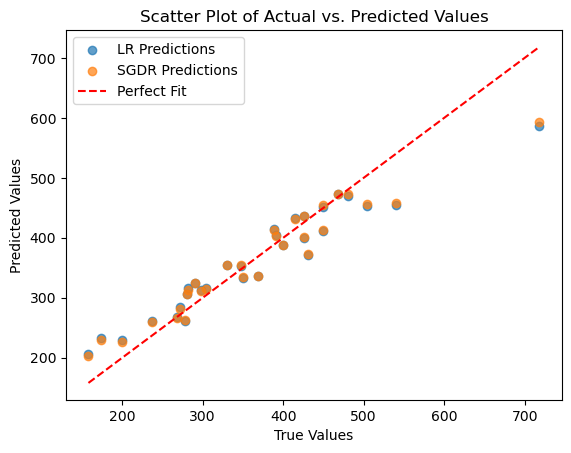

In [18]:
plt.scatter(y_test, y_val_lr, label='LR Predictions', alpha=0.7)
plt.scatter(y_test, y_val_sgdr, label='SGDR Predictions', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Fit')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs. Predicted Values')
plt.legend()
plt.show()